# Analisis Exploratorio
## Laboratorio 1 - Mineria de Datos
### Nelson Escalante - 22046

# SETUP

Preparacion del entorno de trabajo.

In [1]:
#importar pandas
import pandas as pd
import matplotlib.pyplot as plt

#convertir los datos de movies.csv en un dataframe para trabajar
path = "movies.csv"
moviesdf = pd.read_csv(path, encoding='latin_1')
moviesdf

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,920081,0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,...,16.662,2021-11-26,6.8,108,2,1,1,10,2,4
9996,920143,0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,...,491.706,2021-12-25,1.5,2,1,2,1,8,1,1
9997,922017,0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,...,565.658,2021-12-17,6.1,30,1,1,17,1,0,922017
9998,922162,0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,...,9.664,2021-12-17,6.0,1,1,0,0,0,922162,The Witcher: Fireplace


# SECCION 1

Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos.

In [2]:
moviesdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object 
 13  actorsCharacter            9953 non-null   obje

# SECCION 2

Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)

En base a la informacion obtenida en la seccion anterior, podemos describir los tipos de variables de la siguiente manera:

- id: cualitativa ordinal
- budget: cuantitativa continua
- homePage: cualitativa nominal
- productionCompany: cualitativa nominal
- productionCompanyCountry: cualitativa nominal
- productionCountry: cualitativa nominal
- revenue: cuantitativa continua
- runtime: cuantitativa continua
- video: cualitativa binaria
- director: cualitativa nominal
- actors: cualitativa nominal
- actorsPopularity: cualitativa ordinal
- actorsCharacter: cualitativa nominal
- originalTitle: cualitativa nominal
- title: cualitativa nominal
- originalLanguage: cualitativa nominal
- popularity: cuantitativa continua
- releaseDate: cualitativa nominal
- voteAvg: cuantitativa continua
- voteCount: cuantitativa discreta
- genresAmount: cuantitativa discreta
- productionCoAmount: cuantitativa discreta
- productionCountriesAmount: cuantitativa discreta
- actorsAmount: cuantitativa discreta
- castWomenAmount: cuantitativa discreta
- castMenAmount: cuantitativa discreta

# SECCION 3

Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados.

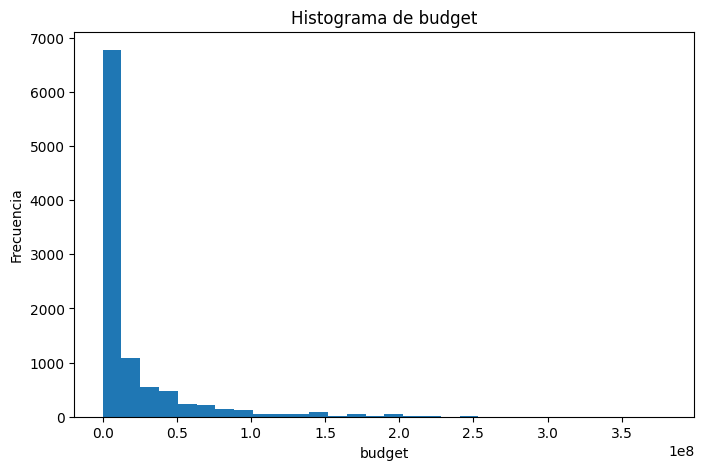

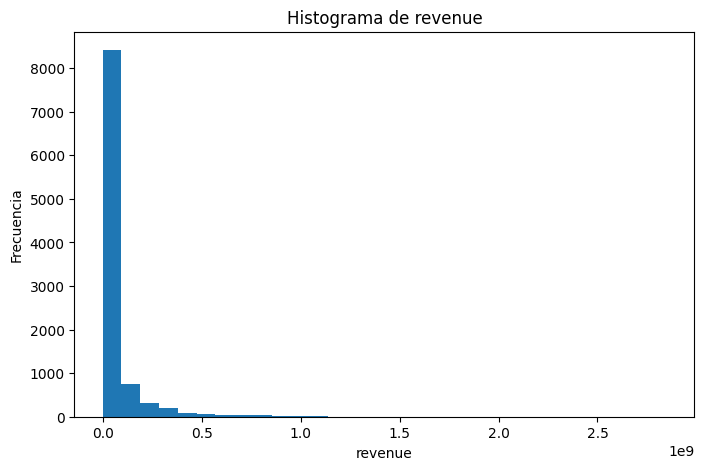

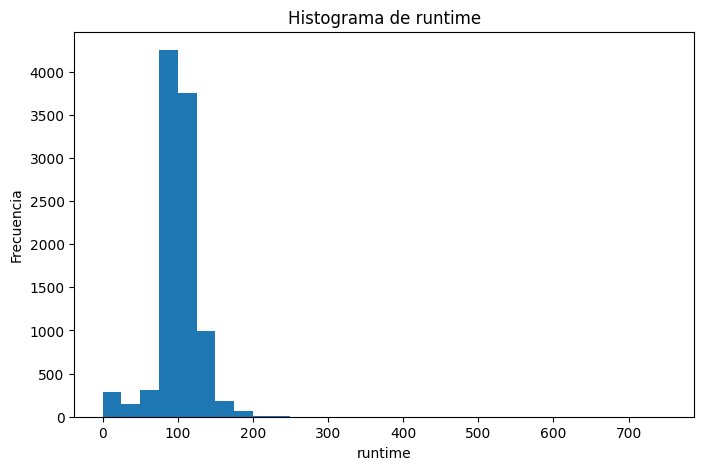

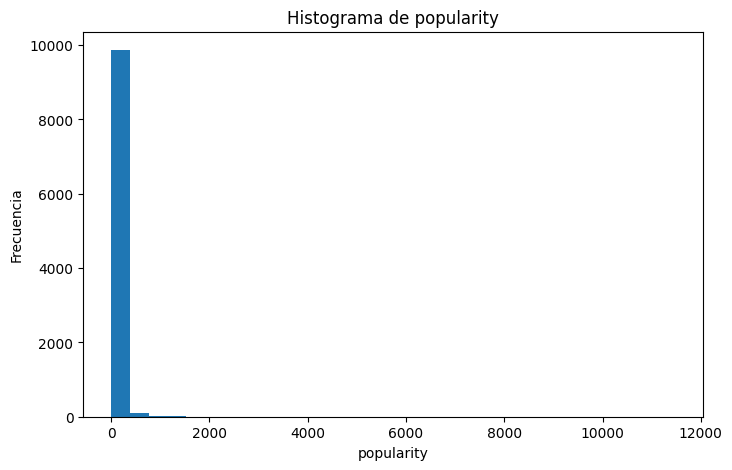

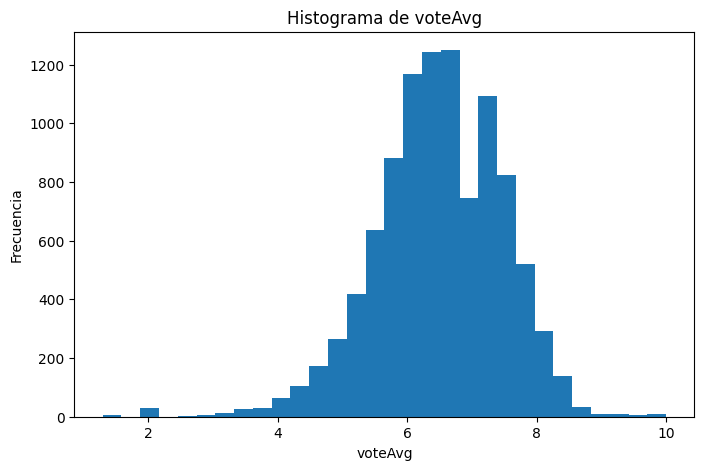

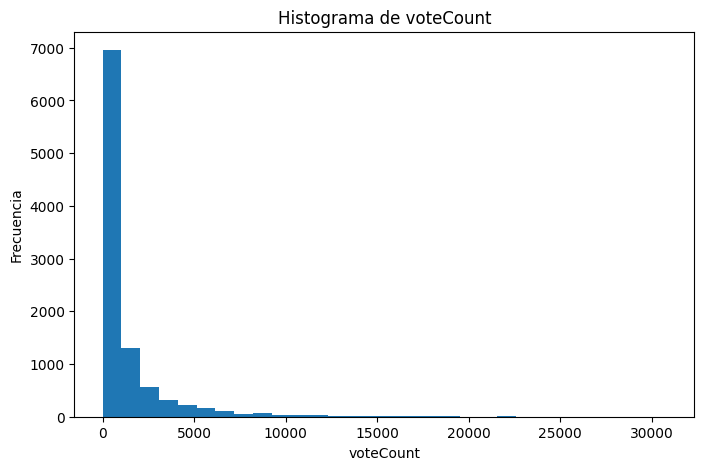

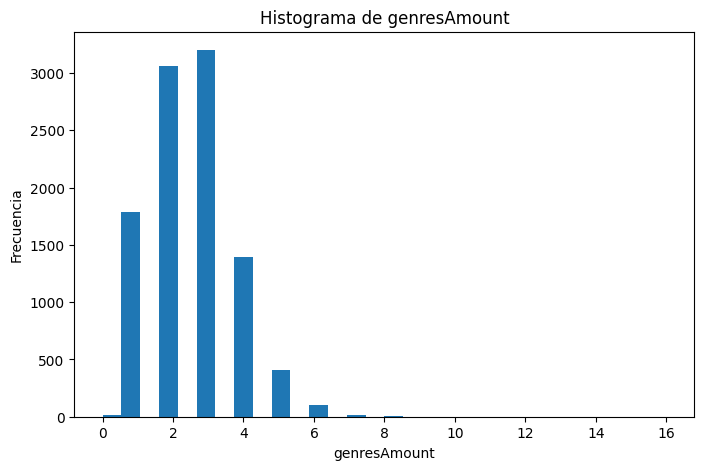

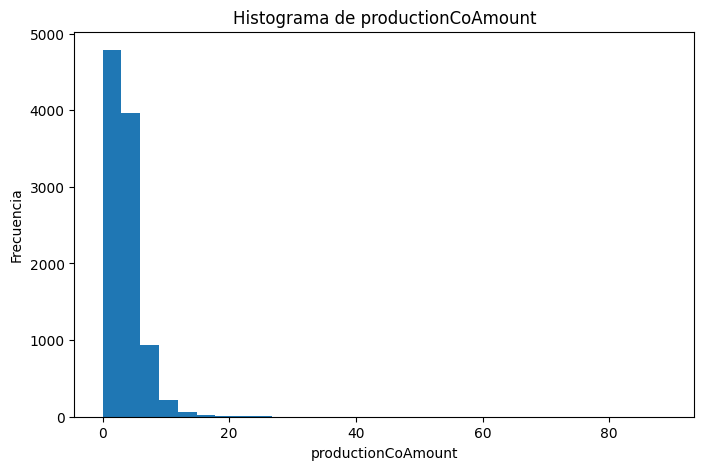

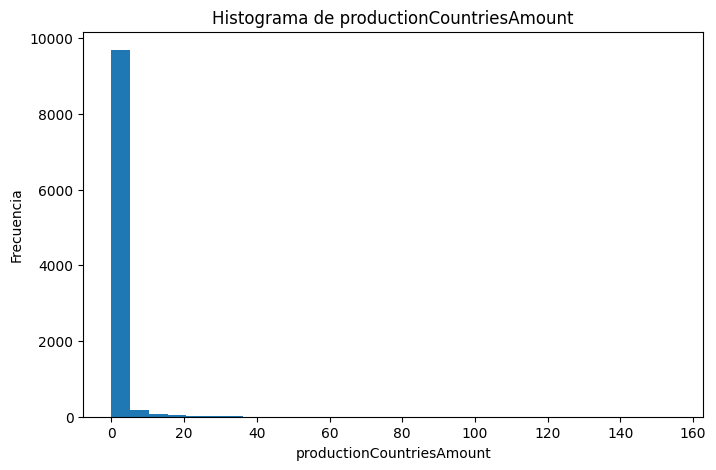

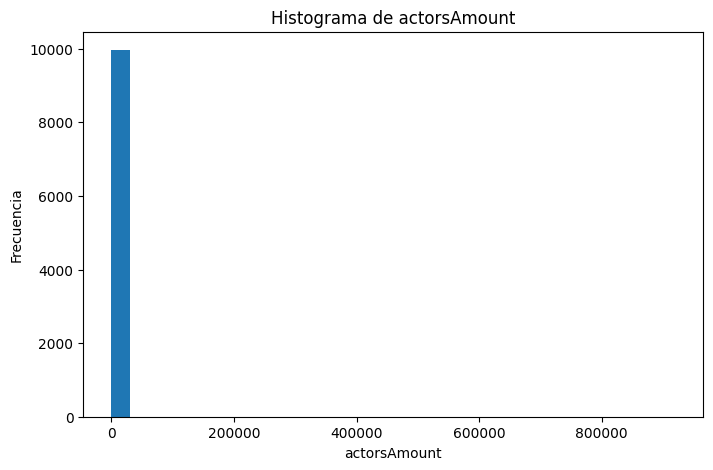

In [15]:
#Guardar en una lista las variables numericas
numeric = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount']

for col in numeric:
    plt.figure(figsize=(8, 5))
    plt.hist(moviesdf[col].dropna(), bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [16]:
#Implementacion de pruebas de normalidad
#Voy a usar la libreria 'spicy' segun ChatGPT
from scipy import stats

for col in numeric:
    stat, p = stats.shapiro(moviesdf[col].dropna())
    print(f'{col}: estadístico={stat:.4f}, p-valor={p:.4f}')
    if p > 0.05:
        print(f"La variable {col} parece seguir una distribución normal.\n")
    else:
        print(f"La variable {col} NO sigue una distribución normal.\n")

budget: estadístico=0.5684, p-valor=0.0000
La variable budget NO sigue una distribución normal.

revenue: estadístico=0.4143, p-valor=0.0000
La variable revenue NO sigue una distribución normal.

runtime: estadístico=0.8531, p-valor=0.0000
La variable runtime NO sigue una distribución normal.

popularity: estadístico=0.1112, p-valor=0.0000
La variable popularity NO sigue una distribución normal.

voteAvg: estadístico=0.9796, p-valor=0.0000
La variable voteAvg NO sigue una distribución normal.

voteCount: estadístico=0.5261, p-valor=0.0000
La variable voteCount NO sigue una distribución normal.

genresAmount: estadístico=0.9054, p-valor=0.0000
La variable genresAmount NO sigue una distribución normal.

productionCoAmount: estadístico=0.7150, p-valor=0.0000
La variable productionCoAmount NO sigue una distribución normal.

productionCountriesAmount: estadístico=0.2332, p-valor=0.0000
La variable productionCountriesAmount NO sigue una distribución normal.

actorsAmount: estadístico=0.0310,

In [ ]:
#Guardar las variables cualitativas en una lista e imprimir las tablas de frecuencias.
nonNumeric = ['genres', 'homePage', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter', 'originalTitle', 'title', 'originalLanguage', 'releaseDate']

for col in nonNumeric:
    print(f'Tabla de frecuencias de {col}')
    print(moviesdf[col].value_counts())
    print('\n')

# SECCION 4

Responda las siguientes preguntas:

### Ejercicio 1:

Cuales son las 10 peliculas que contaron con mas presupuesto?

In [4]:
#Ordenar las peliculas por presupuesto en orden descendiente e imprimir el top 10
moviesdf.sort_values(by=['budget'], ascending=False).head(10)[['title', 'budget']]

,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000
4710,Avengers: Age of Ultron,365000000
5952,Avengers: Endgame,356000000
5953,Avengers: Infinity War,300000000
163,Pirates of the Caribbean: At World's End,300000000
4953,Justice League,300000000
607,Superman Returns,270000000
3791,Tangled,260000000
7134,The Lion King,260000000
280,Spider-Man 3,258000000


### Ejercicio 2

Cuales son las 10 peliculas que mas ingresos tuvieron?

In [5]:
#Ordenar las peliculas por 'revenue' en orden descendente e imprimir el top 10
moviesdf.sort_values(by=['revenue'], ascending=False).head(10)[['title', 'revenue']]

,title,revenue
3210,Avatar,2.847246e+09
5952,Avengers: Endgame,2.797801e+09
307,Titanic,2.187464e+09
4947,Star Wars: The Force Awakens,2.068224e+09
5953,Avengers: Infinity War,2.046240e+09
4914,Jurassic World,1.671713e+09
7134,The Lion King,1.667635e+09
9049,Spider-Man: No Way Home,1.631853e+09
3397,The Avengers,1.518816e+09
5087,Furious 7,1.515048e+09


### Ejercicio 3

Cual es la pelicula que mas votos tuvo?

In [6]:
#Estoy asumiendo que se refiere a la cantidad de votos
moviesdf.sort_values(by=['voteCount'], ascending=False).head(1)[['title', 'voteCount']]

,title,voteCount
3511,Inception,30788


### Ejercicio 4

Cual es la peor pelicula de acuerdo a los votos de los usuarios?

In [7]:
#Obtener la pelicula con el peor 'voteAvg'
moviesdf.sort_values(by=['voteAvg'], ascending=True).head(1)[['title', 'voteAvg']]

,title,voteAvg
9786,DAKAICHI -I'm Being Harassed by the Sexiest Ma...,1.3


### Ejercicio 5

Cuantas peliculas se hicieron en cada anio? En que anio se hicieron mas peliculas? Haga un grafico de barras

In [8]:
#Contar las peliculas por anio
#Para esto convertire la fecha al formato de fecha de pandas
moviesdf['releaseDate'] = pd.to_datetime(moviesdf['releaseDate'])

#Luego, contare las concurrencias de por anio
yearCount = moviesdf['releaseDate'].dt.year.value_counts()
yearCount

releaseDate
2021    816
2018    629
2017    618
2019    612
2016    557
       ... 
1922      1
1938      1
1933      1
1921      1
1936      1
Name: count, Length: 99, dtype: int64

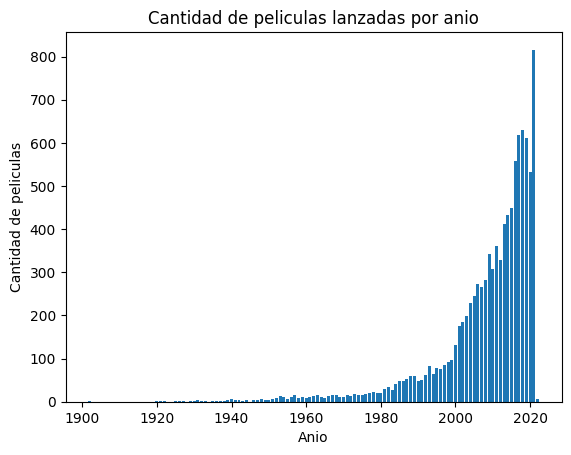

In [9]:
#Ahora, se grafica el resultado obtenido
plt.bar(yearCount.index, yearCount.values)

plt.xlabel('Anio')
plt.ylabel('Cantidad de peliculas')
plt.title('Cantidad de peliculas lanzadas por anio')

plt.show()

### Ejercicio 6

Cual es el genero principal de las 20 peliculas mas recientes? Cual es el genero principal que predomina en el conjunto de datos? Representelo usando un grafico. A que genero principal pertenecen las peliculas mas largas?

In [10]:
#Guardar las 20 peliculas mas recientes en una variable
recentMovies = moviesdf.sort_values(by=['releaseDate'], ascending=False).head(20)

#Separar cada genero en una fila individual
genresRecentMovies = recentMovies['genres'].str.split('|').explode()

#Realizar un conteo del genero de estas peliculas
genresCount = genresRecentMovies.value_counts()
genresCount

genres
Drama          7
Comedy         7
Thriller       3
Action         3
Romance        3
Fantasy        3
Mystery        2
Adventure      2
Horror         2
Animation      1
Documentary    1
Crime          1
Family         1
Name: count, dtype: int64

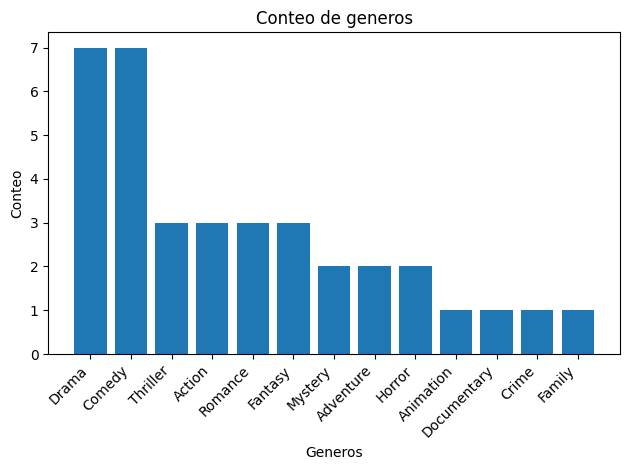

In [11]:
#Graficar los datos obtenidos anteriormente
plt.bar(genresCount.index, genresCount.values)

plt.xlabel('Generos')
plt.ylabel('Conteo')
plt.title('Conteo de generos')

#Ajustar el grafico para evitar que se traslapen los textos
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()